In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os , joblib , missingno

In [39]:
data=pd.read_csv("C:\\Users\\Dell\\Videos\\housing.csv")

In [40]:
#printing the first 5 rows
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
#the info() method is typically used to get a concise summary of a DataFrame, including the data types and non-null counts for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
# statistics Numeric
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
# check Null
data.isnull().sum(axis=0)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#The dropna() method is used to remove missing values (NaN or null values) from a DataFrame as we have small number of non values so we will drop them.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


No Null Values

# Visualizations

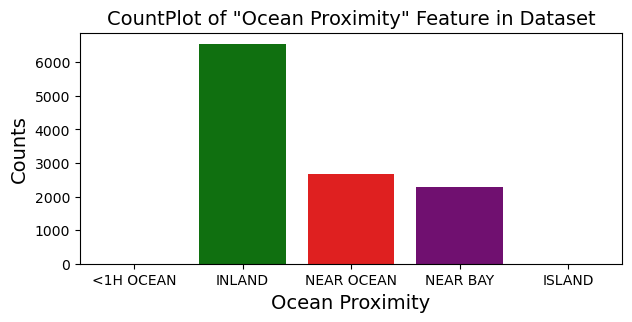

In [44]:
# statistics categorical
import warnings

# Display only the unique values in the 'ocean_proximity' column
ocean_proximity = data['ocean_proximity'].unique()

# Count the occurrences of each unique value in the 'ocean_proximity' column
Descending = data['ocean_proximity'].value_counts()

# Replace '<1H OCEAN' with '1H OCEAN' in the 'ocean_proximity' column
data['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN', inplace=True)

# Plot a countplot for 'ocean_proximity'
plt.figure(figsize=(7, 3))
custom_colors = ["blue", "green", "red", "purple", "orange"] 
sns.countplot(x='ocean_proximity', data=data, order=Descending.index, palette=custom_colors)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()


we see that people living <1H OCEAN are more than 8000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

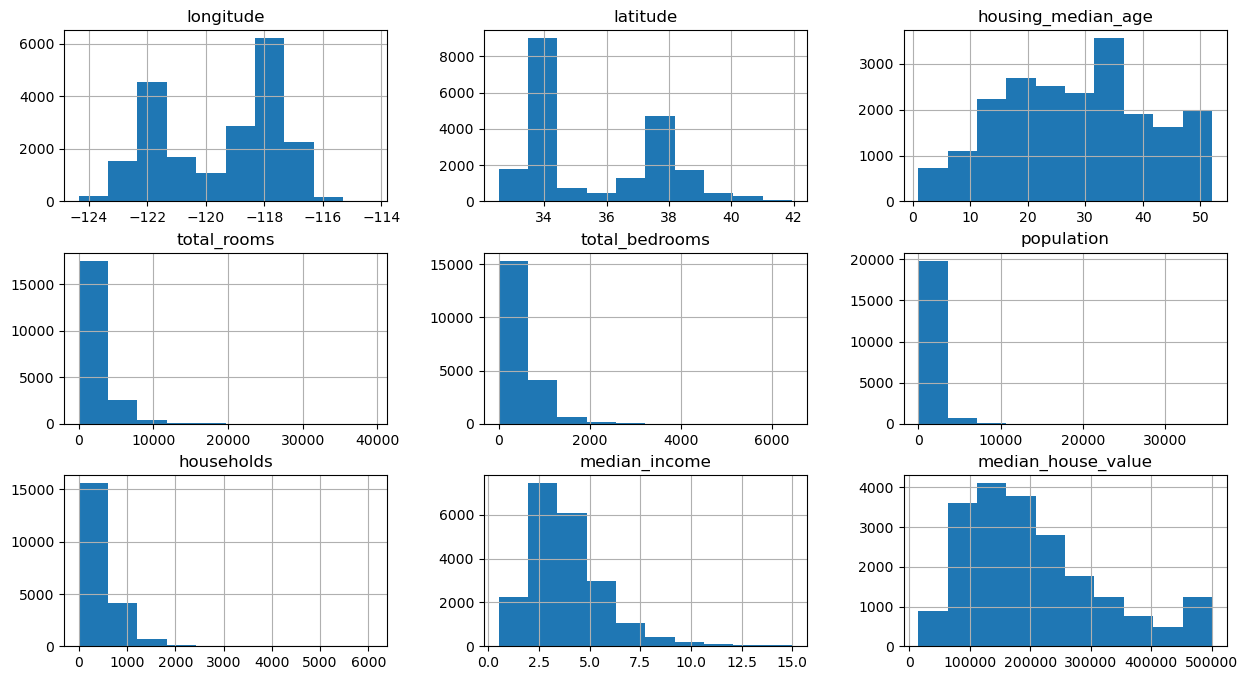

In [45]:
data.hist(figsize=(15,8))

It looks like data columns are mostly left skewed

In [46]:
#applying the natural logarithm (np.log()) transformation to columns in train_data.
#Logarithmic transformations are commonly used in linear regression to handle skewed data or to stabilize variance.
data['total_rooms']=np.log(data['total_rooms'])
data['total_bedrooms']=np.log(data['total_bedrooms'])
data['population']=np.log(data['population'])
data['households']=np.log(data['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

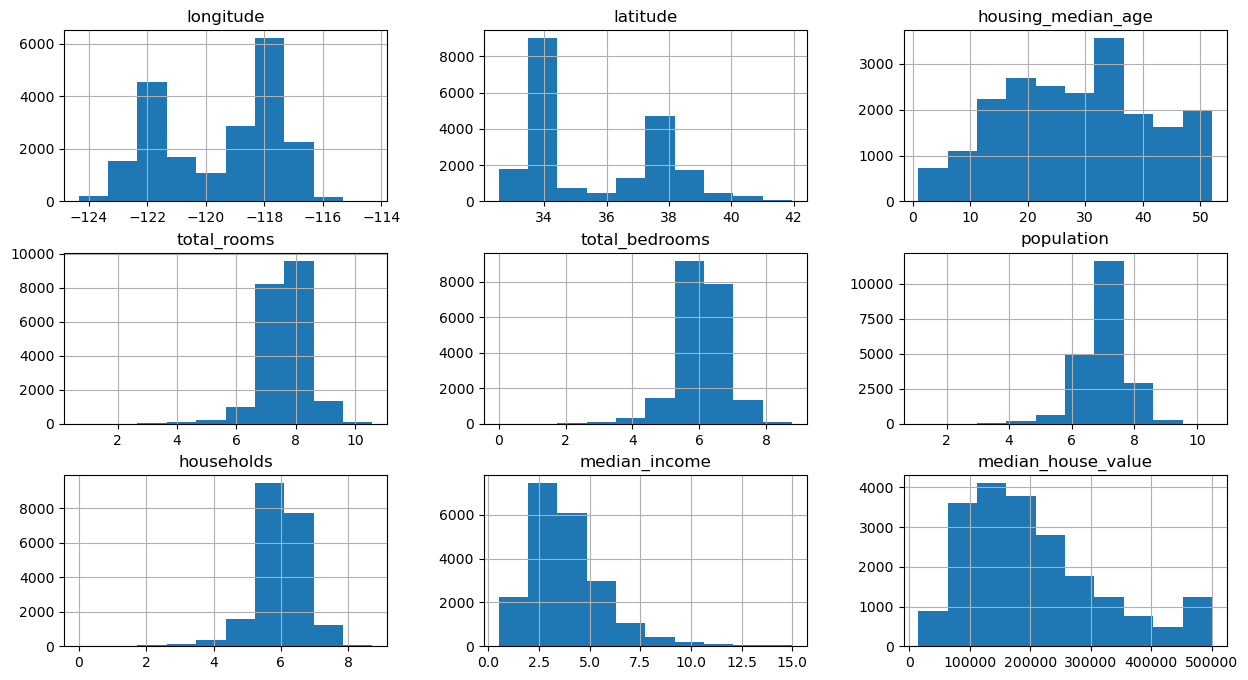

In [47]:
data.hist(figsize=(15,8))

The data is more centered

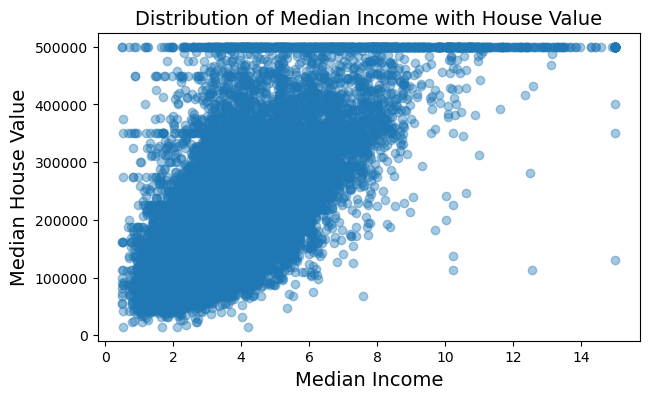

In [48]:

# Set the size of the figure
plt.figure(figsize=(7, 4))

# Create a scatter plot of 'median_income' vs. 'median_house_value'
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.4)

# Set the title of the plot
plt.title('Distribution of Median Income with House Value', fontsize=14, c='k')

# Label the x-axis
plt.xlabel('Median Income', fontsize=14, c='k')

# Label the y-axis
plt.ylabel('Median House Value', fontsize=14, c='k')

# Show the plot
plt.show()


We the more the income is,the more the house value is

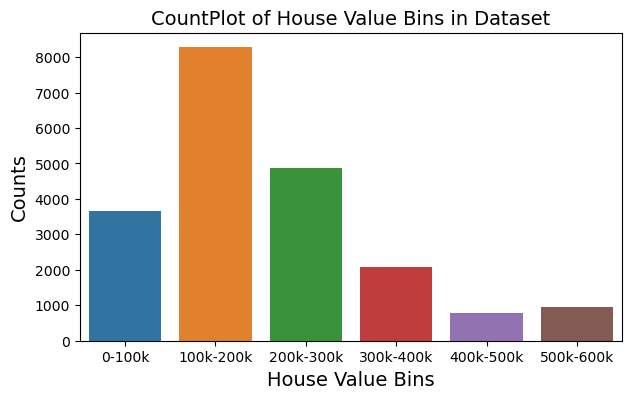

In [49]:
# Create bins for 'median_house_value'
house_value_bins = pd.cut(
    x=data['median_house_value'],
    bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
    labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k']
)

# Set the size of the figure
plt.figure(figsize=(7, 4))

# Create a countplot of 'house_value_bins'
sns.countplot(x=house_value_bins)

# Set the title of the plot
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')

# Label the x-axis
plt.xlabel('House Value Bins', fontsize=14, c='k')

# Label the y-axis
plt.ylabel('Counts', fontsize=14, c='k')

# Show the plot
plt.show()


We see that the highest house value that the people bought is between 100k-200k

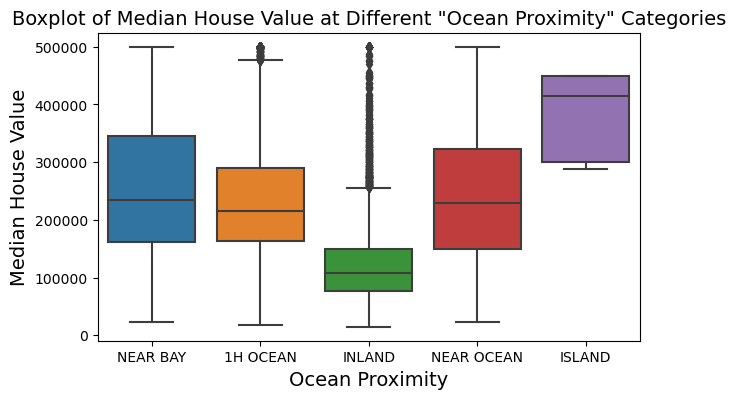

In [50]:
# Set the size of the figure
plt.figure(figsize=(7, 4))

# Create a boxplot of 'median_house_value' at different 'ocean_proximity' categories
sns.boxplot(y='median_house_value', data=data, x='ocean_proximity')

# Set the title of the plot
plt.title('Boxplot of Median House Value at Different "Ocean Proximity" Categories', fontsize=14, c='k')

# Label the x-axis
plt.xlabel('Ocean Proximity', fontsize=14, c='k')

# Label the y-axis
plt.ylabel('Median House Value', fontsize=14, c='k')

# Show the plot
plt.show()


We see that houses INLAND have the lowest House Value and Houses on Island have the highest house value

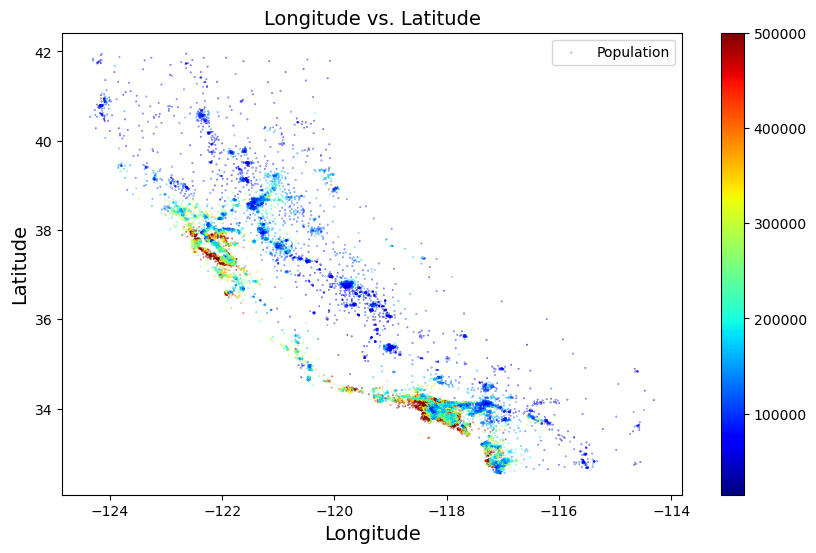

In [51]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot with population-based size and median_house_value-based color
sc = plt.scatter(x=data['longitude'], y=data['latitude'], 
                 s=data['population']/100, c=data['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')

# Add a colorbar to the plot
plt.colorbar(sc)

# Label the x-axis
plt.xlabel('Longitude', fontsize=14, c='k')

# Label the y-axis
plt.ylabel('Latitude', fontsize=14, c='k')

# Set the title of the plot
plt.title('Longitude vs. Latitude', fontsize=14, c='k')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



This just shows us the that people living on Island and near Ocean have the highest median house values

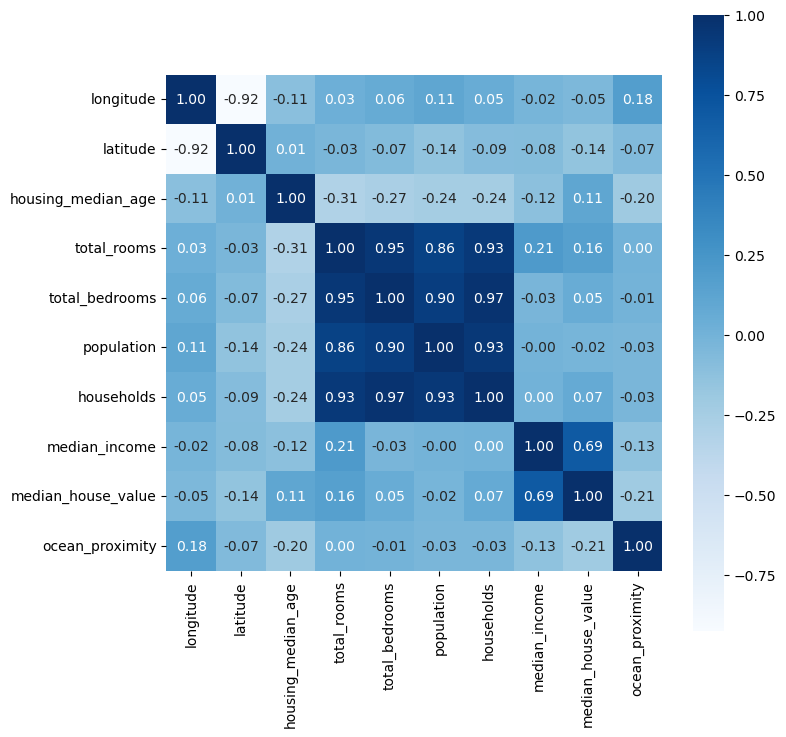

In [52]:
# Convert 'ocean_proximity' to numerical values using factorize
data['ocean_proximity'], _ = pd.factorize(data['ocean_proximity'])

# Calculate the correlation between each feature and 'median_house_value'
correlation_at_cols = data.corr()['median_house_value'].sort_values(ascending=False)

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(), cmap='Blues', annot=True, square=True, fmt='.2f')

# Show the plot
plt.show()


We see that there is postive correlation between median_house_value and median_income also between total_rooms 

# Feature Engineering

In [53]:
# Create new features based on existing columns
#knowing the total number of rooms in each household
data['rooms_per_household'] = data['total_rooms'] / data['households']

#knowing the how many rooms are bedrooms from the total rooms
data['bedrooms_per_rooms'] = data['total_bedrooms'] / data['total_rooms']

#Knowing the population in the household
data['population_per_household'] = data['population'] / data['households']

# Calculate the correlation between each new feature and 'median_house_value'
correlation_with_target = data.corr()['median_house_value'].sort_values(ascending=False)

# Display the correlation values
correlation_with_target

median_house_value          1.000000
median_income               0.688075
total_rooms                 0.159227
housing_median_age          0.105623
rooms_per_household         0.099292
households                  0.073175
total_bedrooms              0.052926
population                 -0.021158
longitude                  -0.045967
latitude                   -0.144160
population_per_household   -0.171759
bedrooms_per_rooms         -0.191640
ocean_proximity            -0.210600
Name: median_house_value, dtype: float64

In [54]:
# Split the dataset into features (X) and target variable (y) which is the median house value
X = data.drop(columns=['median_house_value'], axis=1)  
y = data['median_house_value']   

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

# Display the shapes of the training and testing sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)


X_train shape --  (17544, 12)
y_train shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


In [67]:
print("Number of infinite values in X_train:", np.sum(np.isinf(X_train)))


Number of infinite values in X_train: longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         1
bedrooms_per_rooms          0
population_per_household    1
dtype: int64


In [66]:
print("Number of NaN values in X_train:", np.sum(np.isnan(X_train)))


Number of NaN values in X_train: longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_rooms          0
population_per_household    0
dtype: int64


In [71]:
# Replace Infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
num_cols= X_train.columns
# Replace NaN values with median using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)


In [73]:
# Impute missing values in numerical columns of training data
X_train_filled = imputer.transform(X_train[num_cols])

# Impute missing values in numerical columns of test data
X_test_filled = imputer.transform(X_test[num_cols])

## using StandardScaler for each Feature to be (mean=0, std=1)
scaler = StandardScaler() 

# Scale the features of the training data
X_train_scaled = scaler.fit_transform(X_train_filled)

# Scale the features of the test data using the same scaler
X_test_scaled = scaler.transform(X_test_filled)

# Alternatively, you can use Pipeline for a more concise approach
# from sklearn.pipeline import Pipeline
# pipeline = Pipeline([('imputer', imputer), ('scaler', scaler)])
# X_train_scaled = pipeline.fit_transform(X_train[num_cols])
# X_test_scaled = pipeline.transform(X_test[num_cols])

# Display the shapes of the scaled datasets
print('X_train_scaled shape -- ', X_train_scaled.shape)
print('X_test_scaled shape -- ', X_test_scaled.shape)


X_train_scaled shape --  (17544, 12)
X_test_scaled shape --  (3096, 12)


# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the scaled training data
lin_reg.fit(X_train_scaled, y_train)

# Use cross-validation to evaluate the model using negative mean squared error (sklearn convention)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_scaled, y=y_train, 
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [79]:
# Convert negative mean squared error to positive root mean squared error
rmse_scores_lin = -1 * rmse_scores_lin  
rmse_scores_lin = np.sqrt(rmse_scores_lin)

# Display the RMSE scores for each fold in cross-validation
print(f'RMSE Scores --- {np.round(rmse_scores_lin, 4)}')

# Display the mean RMSE score across all folds
print(f'Mean of RMSE Scores --- {rmse_scores_lin.mean():.4f}')

# Add separator for better readability
print('****'*20)

# Make predictions using cross-validation
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_scaled, y=y_train, cv=5, method='predict', n_jobs=-1)

# Calculate the RMSE after prediction
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction --- {rmse_pred_lin:.4f}')  ## almost the same result :D


RMSE Scores --- [65047.3904 67520.6419 65579.686  65488.7309 68349.3967]
Mean of RMSE Scores --- 66397.1692
********************************************************************************
RMSE after prediction --- 66409.6901


This code demonstrates the training, evaluation, and prediction steps for a linear regression model using cross-validation.
The root mean squared error is used as a metric to assess the model's performance. 
The process helps in understanding how well the model generalizes to new data and makes predictions on the
target variable (median_house_value).

The RMSE (Root Mean Squared Error) is a measure of how well a regression model performs. In the context of your linear regression model:

RMSE Scores during Cross-Validation:

The five RMSE scores obtained during cross-validation

The mean of these scores is calculated to be approximately 66397.1692.

On average, the model's predictions have an error of around 66397.1692 in terms of the target variable (median house value) when evaluated across different folds of the training data.

RMSE after Prediction on the Entire Training Set:

After making predictions on the entire training set using cross-validation, a final RMSE of approximately 66409.6901 is obtained.

This is another measure of the model's performance, indicating that, on average, the model's predictions have an error of around 66409.6901 when considering the entire training set.

In both cases, a lower RMSE value indicates better model performance. The RMSE values provide a measure of how much the predicted values deviate from the actual values. While individual RMSE values for each fold may vary, the mean RMSE and the final RMSE after prediction on the entire training set give an overall sense of the model's accuracy in predicting the target variable.

In [81]:
# Predict the target variable on the test dataset using the trained linear regression model
y_pred_test = lin_reg.predict(X_test_scaled) 

# Calculate the Root Mean Squared Error (RMSE) between actual and predicted values on the test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the RMSE on the test dataset using linear regression, rounded to three decimal places
print(f'RMSE on test Dataset using Linear Regression -- {rmse_test:.3f}')


RMSE on test Dataset using Linear Regression -- 72742.260


On the test dataset, the linear regression model's predictions have an average error (RMSE) of approximately 72742.260 in terms of the target variable (median house value).

In simpler terms, this means that, on average, the model's predictions on the test set are off by around $72,742.26 when compared to the actual median house values. A lower RMSE would indicate better predictive performance, so in this context, the model's predictions may have room for improvement.As linear Regression is not the best option to consider